In [6]:
import pandas as pd

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')


In [9]:
csv_files = ['movies.csv', 'ratings.csv', 'links.csv', 'tags.csv']
print(f'Number of CSV files: {len(csv_files)}')

Number of CSV files: 4


In [ ]:
print(f'Shape of movies.csv: {movies.shape}')
print(f'Shape of ratings.csv: {ratings.shape}')

In [4]:
print(f'Shape of movies.csv: {movies.shape}')
print(f'Shape of ratings.csv: {ratings.shape}')
unique_users = ratings['userId'].nunique()
print(f'Number of unique userId: {unique_users}')


Shape of movies.csv: (9742, 3)
Shape of ratings.csv: (100836, 4)
Number of unique userId: 610


In [12]:
ratings_count = ratings.groupby('movieId').size().reset_index(name='counts')
max_ratings_movie = ratings_count[ratings_count['counts'] == ratings_count['counts'].max()]
max_ratings_movie_id = max_ratings_movie['movieId'].values[0]

max_rated_movie = movies[movies['movieId'] == max_ratings_movie_id]['title'].values[0]
print(f'Movie with maximum number of user ratings: {max_rated_movie}')


Movie with maximum number of user ratings: Forrest Gump (1994)


In [13]:
matrix_movie_id = movies[movies['title'].str.contains('Matrix, The')]['movieId'].values[0]
matrix_tags = tags[tags['movieId'] == matrix_movie_id]['tag'].unique()
print(f'Tags for Matrix, The (1999): {matrix_tags}')


Tags for Matrix, The (1999): ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [14]:
t2_movie_id = movies[movies['title'].str.contains('Terminator 2')]['movieId'].values[0]
t2_ratings = ratings[ratings['movieId'] == t2_movie_id]['rating'].mean()
print(f'Average rating for Terminator 2: Judgment Day (1991): {t2_ratings}')

Average rating for Terminator 2: Judgment Day (1991): 3.970982142857143


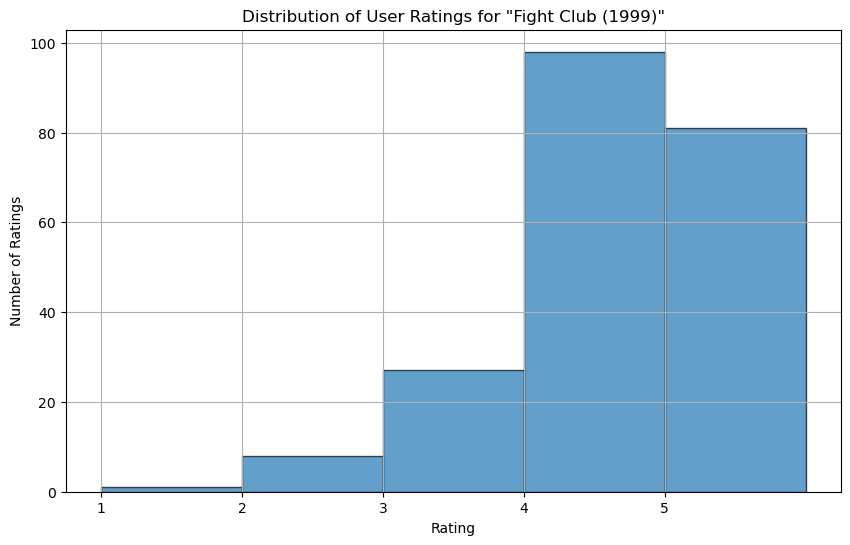

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

movie_title = "Fight Club (1999)"
fight_club_movie_id = movies[movies['title'] == movie_title]['movieId'].values

if len(fight_club_movie_id) == 0:
    print(f"Movie title '{movie_title}' not found in the database.")
else:
    
    fight_club_movie_id = fight_club_movie_id[0]
    
    
    ratings = ratings[ratings['movieId'] == fight_club_movie_id]['rating']

    plt.figure(figsize=(10, 6))
    plt.hist(ratings, bins=range(1, 7), edgecolor='black', alpha=0.7)
    plt.title('Distribution of User Ratings for "Fight Club (1999)"')
    plt.xlabel('Rating')
    plt.ylabel('Number of Ratings')
    plt.xticks(range(1, 6))  # Adjust the x-ticks to match rating scale
    plt.grid(True)
    plt.show()


In [16]:
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']})
grouped_ratings.columns = ['count', 'mean_rating']

filtered_movies = grouped_ratings[grouped_ratings['count'] > 50]

popular_movies = pd.merge(filtered_movies, movies, on='movieId')


In [17]:
most_popular_movie = popular_movies[popular_movies['mean_rating'] == popular_movies['mean_rating'].max()]
print(f'Most popular movie based on average user ratings: {most_popular_movie["title"].values[0]}')


Most popular movie based on average user ratings: Shawshank Redemption, The (1994)


In [18]:
top_5_movies = popular_movies.sort_values(by='count', ascending=False).head(5)
print('Top 5 popular movies based on the number of user ratings:')
print(top_5_movies[['title', 'count']])


Top 5 popular movies based on the number of user ratings:
                                title  count
61                Forrest Gump (1994)    329
53   Shawshank Redemption, The (1994)    317
49                Pulp Fiction (1994)    307
99   Silence of the Lambs, The (1991)    279
248                Matrix, The (1999)    278


In [6]:
import pandas as pd
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
links_df = pd.read_csv('links.csv')

ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']

filtered_movies_df = ratings_grouped[ratings_grouped['rating_count'] > 50]

filtered_movies_df = filtered_movies_df.merge(movies_df, on='movieId')
filtered_movies_df = filtered_movies_df.merge(links_df, on='movieId')

print(f"Number of movies with more than 50 ratings: {len(filtered_movies_df)}")


Number of movies with more than 50 ratings: 436


## Webscrapping

In [2]:
import requests
from bs4 import BeautifulSoup
import time

def get_imdb_reviews(imdb_id, max_reviews=10):
    reviews = []
    url = f"https://www.imdb.com/title/tt{imdb_id}/reviews"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    review_blocks = soup.find_all('div', class_='text show-more__control', limit=max_reviews)

    for review in review_blocks:
        reviews.append(review.text.strip())

    return reviews
filtered_movies_df['imdb_reviews'] = filtered_movies_df['imdbId'].apply(lambda x: get_imdb_reviews(str(x).zfill(7)))

print(filtered_movies_df[['movieId', 'title', 'imdb_reviews']].head())##First five rows


   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
3        6              Heat (1995)   
4        7           Sabrina (1995)   

                                        imdb_reviews  
0  [I am a big fan of the animated movies coming ...  
1  [I have not seen this movie in more then a dec...  
2  [Some people see this as an inferior sequel to...  
3  [I have very little interest in most action fi...  
4  [Although terribly predictable and a bit too l...  


In [3]:
filtered_movies_df.to_csv('movies_with_reviews.csv', index=False) #saving to csv file


In [4]:
sci_fi_movies_df = filtered_movies_df[filtered_movies_df['genres'].str.contains('Sci-Fi')]

print(f"Number of Sci-Fi movies with more than 50 ratings: {len(sci_fi_movies_df)}")## checking shape 


Number of Sci-Fi movies with more than 50 ratings: 88
